# Polynomial Prediction
 
 Given a polynomial $2x^3 - x^2 + x - 5$, plot the function with Gaussian noise. Use Chi-Squared, MLE, and TensorFlow to predict the polynomial equation and integration to assess accuracy
 

## Graphing Polynomial

A graph of the function $2x^3 - x^2 + x - 5$ with no sigma. For comparison purposes


True area under curve: -10.666666666666666


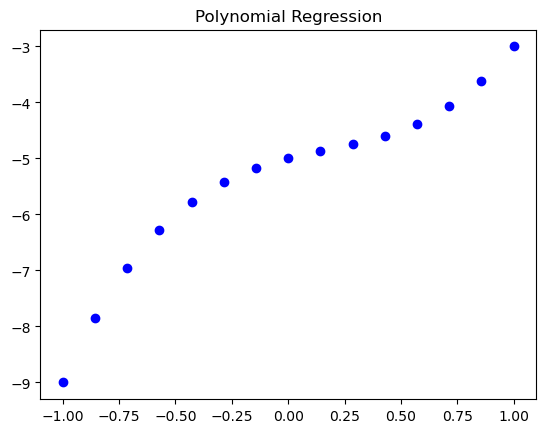

In [1]:
from polynomial_integrator import PolynomialIntegrator

import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 2*(x**3) - (x**2) + x - 5

x_values = np.linspace(start = -1, stop = 1, num = 15)

y_pred = f(x_values) # exact based on the polynomial

plt.scatter(x_values, y_pred, color = 'blue')
plt.title("Polynomial Regression")

integrator = PolynomialIntegrator([2, -1, 1, -5])
true_area = integrator.integrate_polynomial(-1, 1)[0]
print(f"True area under curve: {true_area}")



## Chi Squared Regression

Best-fit parameters (Chi-Squared Minimization): [ 1.77743483 -1.09791372  1.03682589 -4.9634807 ]
Area under the curve (sigma = 0.1). Area: -10.658903881916368. Error: 1.1833760506970011e-13


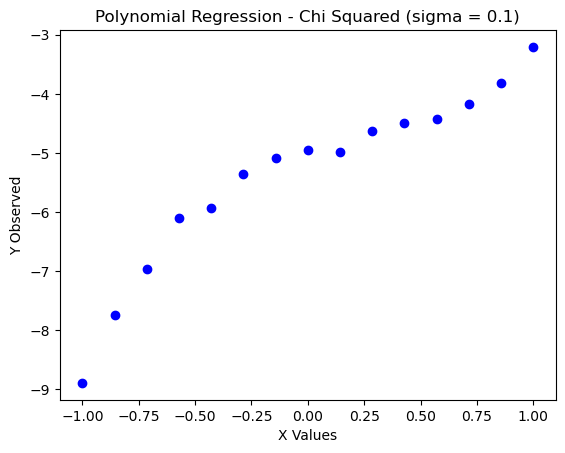

Best-fit parameters (Chi-Squared Minimization): [ 1.87219436 -1.01093962  1.12883445 -5.06576061]
Area under the curve (sigma = 0.3). Area: -10.805480964995414. Error: 1.1996493759486765e-13


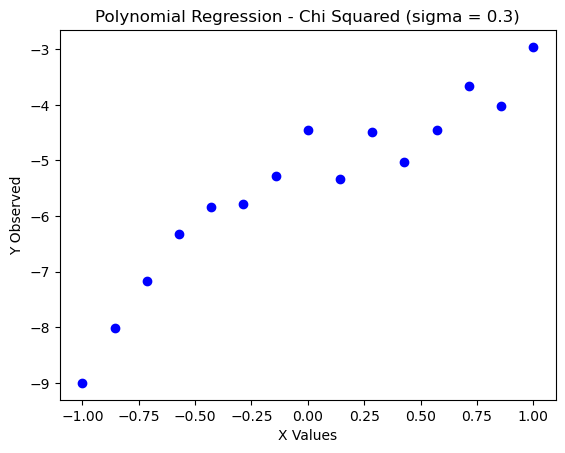

Best-fit parameters (Chi-Squared Minimization): [ 2.19485474 -1.32264507  0.72991959 -4.79631232]
Area under the curve (sigma = 0.5). Area: -10.474388018871478. Error: 1.1628906747408993e-13


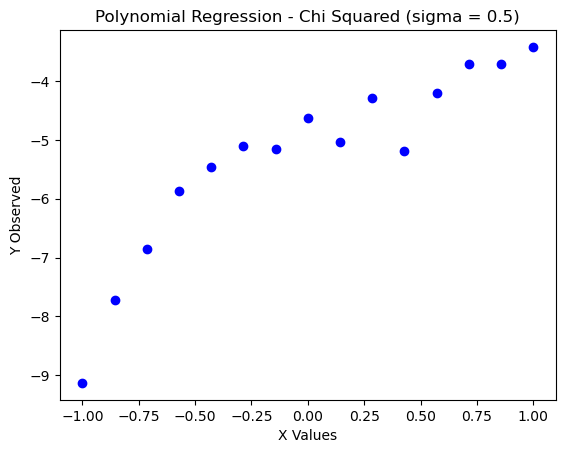

Best-fit parameters (Chi-Squared Minimization): [ 2.35512552 -1.10725533  1.31422225 -4.88798322]
Area under the curve (sigma = 0.7). Area: -10.514136666215055. Error: 1.167303661088754e-13


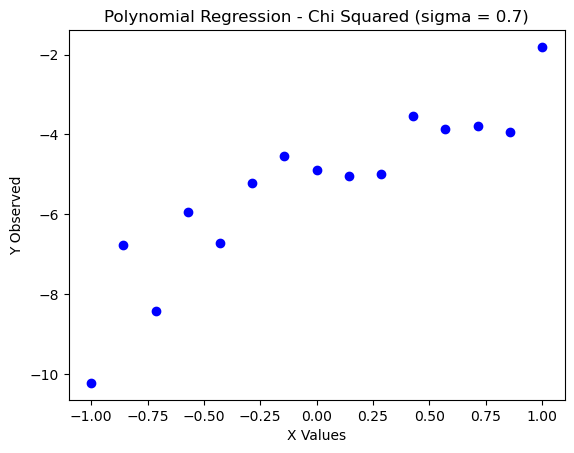

Best-fit parameters (Chi-Squared Minimization): [ 4.18594092 -2.24793117 -0.40606878 -4.68327632]
Area under the curve (sigma = 0.9). Area: -10.8651734148487. Error: 1.2062765691710165e-13


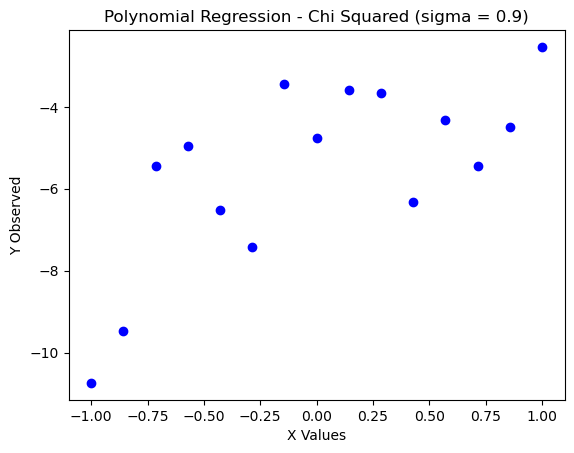

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_chi_squared import PolynomialRegressionChiSquared
from polynomial_integrator import PolynomialIntegrator

# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2

chi_sq_area = np.zeros(5)


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    
    # Create a PolynomialRegressionChiSquared object
    chi_sq = PolynomialRegressionChiSquared(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(chi_sq.x_values, chi_sq.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - Chi Squared (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # Minimize the chi-squared
    try:
        coeffs = chi_sq.minimize_chi_square()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing chi square for sigma = {sigma}: {e}")
    
    if coeffs is not None:
        # Integration using Simpson's Rule
        integrator = PolynomialIntegrator(coeffs)
        area, error = integrator.integrate_polynomial(lower_bound=-1, upper_bound=1)
        chi_sq_area[i] = area
        print(f"Area under the curve (sigma = {chi_sq.sigma:.1f}). Area: {area}. Error: {error}")
    else:
        print(f"Skipping integration for sigma = {sigma} due to error in minimizing chi-square.")

        # Show the plot inline
    plt.show()

## MLE 

Best-fit parameters (MLE): [ 2.17597151 -1.03794162  0.82964178 -4.98770913]
Area under the curve (sigma = 0.1). Area: -10.667379341526766. Error: 1.1843170157373757e-13


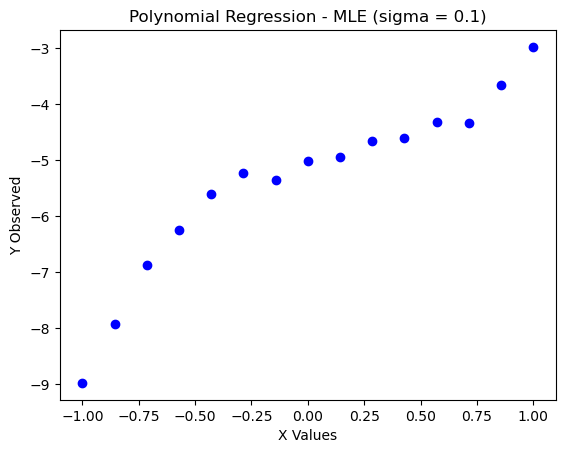

Best-fit parameters (MLE): [ 1.59992527 -1.32995306  1.07594432 -4.96141139]
Area under the curve (sigma = 0.3). Area: -10.809458141648497. Error: 1.2000909312580018e-13


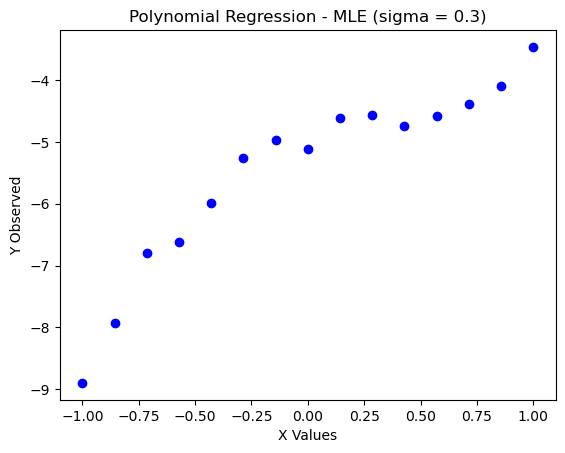

Best-fit parameters (MLE): [ 3.00250339 -1.08988217  0.4856141  -5.25022851]
Area under the curve (sigma = 0.5). Area: -11.227045140973546. Error: 1.2464524014014817e-13


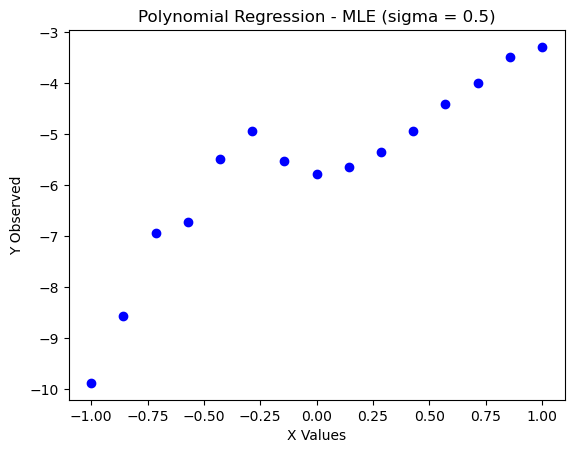

Best-fit parameters (MLE): [ 2.76717686 -1.11070737  0.44063554 -5.08952803]
Area under the curve (sigma = 0.7). Area: -10.919527642302196. Error: 1.2123111006514748e-13


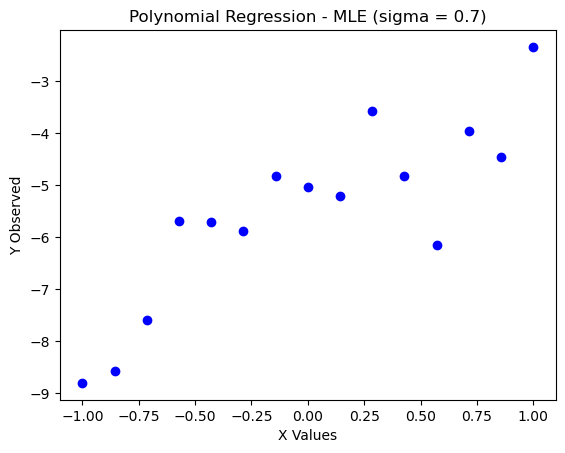

Best-fit parameters (MLE): [ 2.49761019  0.41390708  0.71070214 -5.26905994]
Area under the curve (sigma = 0.9). Area: -10.262181820382228. Error: 1.139331053987805e-13


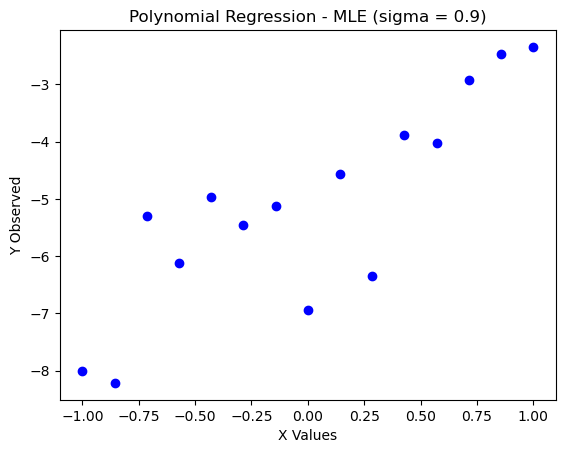

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_mle import PolynomialRegressionMLE

## arrays to hold area
mle_area = np.zeros(5)

# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2


# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    

    mle = PolynomialRegressionMLE(sigma=sigma)
    
    # Plot the observed data
    plt.figure()  # Create a new figure
    plt.scatter(mle.x_values, mle.y_observed, color='blue')
    
    # Set title and labels
    plt.title(f"Polynomial Regression - MLE (sigma = {sigma:.1f})")
    plt.xlabel('X Values')
    plt.ylabel('Y Observed')
    
    # minimize MLe
    try:
        coeffs = mle.minimize_mle()  # Minimize function
    except Exception as e:
        print(f"Error in minimizing negative log likelihood for sigma = {sigma}: {e}")
    
    if coeffs is not None:
        # Integration using Simpson's Rule
        integrator = PolynomialIntegrator(coeffs)
        area, error = integrator.integrate_polynomial(lower_bound=-1, upper_bound=1)
        mle_area[i] = area
        print(f"Area under the curve (sigma = {mle.sigma:.1f}). Area: {area}. Error: {error}")
    else:
        print(f"Skipping integration for sigma = {mle.sigma} due to error in MLE.")

    # Show the plot inline
    plt.show()

Epoch 0, Loss: 14.331949234008789
Epoch 100, Loss: 0.004235691856592894
Epoch 200, Loss: 0.0182194821536541
Epoch 300, Loss: 0.008508752100169659
Learned parameters appended to learned_params.txt
Area under the curve (sigma = 0.1). Area: -10.649629950523376. Error: 1.182346437480872e-13
Epoch 0, Loss: 27.535858154296875
Epoch 100, Loss: 0.16378618776798248
Epoch 200, Loss: 0.09964428842067719
Epoch 300, Loss: 0.09984029084444046
Learned parameters appended to learned_params.txt
Area under the curve (sigma = 0.3). Area: -10.671716372172037. Error: 1.184798522865464e-13
Epoch 0, Loss: 27.577150344848633
Epoch 100, Loss: 0.3630976378917694
Epoch 200, Loss: 0.0931711345911026
Epoch 300, Loss: 0.16438376903533936
Learned parameters appended to learned_params.txt
Area under the curve (sigma = 0.5). Area: -10.710066477457682. Error: 1.1890562398539562e-13
Epoch 0, Loss: 39.439388275146484
Epoch 100, Loss: 0.5853354930877686
Epoch 200, Loss: 0.393808513879776
Epoch 300, Loss: 0.601918339729309

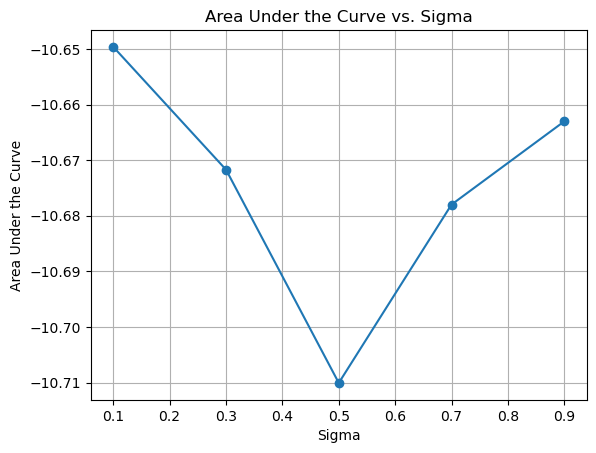

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from polynomial_regression_tf import CubicPolynomialModel
from polynomial_integrator import PolynomialIntegrator  

# Arrays to hold areas
tf_area = np.zeros(5)

# Define constants
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2

# File to log all training results
log_file = "training_log.txt"

# Loop over the range of sigma values
for i, sigma in enumerate(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)):    
    try:
        # Instantiate the model with the current sigma
        model = CubicPolynomialModel(num_points=1000, sigma=sigma, learning_rate=0.01, batch_size=32)
        
        # Log the start of training for this sigma value
        with open(log_file, 'a') as file:
            file.write(f"\nTraining started for sigma = {sigma:.1f} at {model.get_timestamp()}\n")
            file.write("Epoch\tLoss\n")
        
        # Train the model and log the progress in the same file
        model.train(n_epochs=400, log_file=log_file)
        
        # Save the learned parameters to a file
        model.save_learned_parameters(param_file="learned_params.txt")
        
        # Get the model coefficients
        coeffs = [model.a.numpy(), model.b.numpy(), model.c.numpy(), model.d.numpy()]
        
        # Integrate if coefficients are valid
        if coeffs is not None:
            integrator = PolynomialIntegrator(coeffs)
            area, error = integrator.integrate_polynomial(lower_bound=-1, upper_bound=1)
            tf_area[i] = area
            print(f"Area under the curve (sigma = {sigma:.1f}). Area: {area}. Error: {error}")
            
            # Log the area and integration result in the same log file
            with open(log_file, 'a') as file:
                file.write(f"Integration completed for sigma = {sigma:.1f} at {model.get_timestamp()}\n")
                file.write(f"Area under the curve: {area:.5f}, Error: {error}\n")
        else:
            print(f"Error: Coefficients are not valid for sigma = {sigma:.1f}")
    
    except Exception as e:
        print(f"Error in Training Model for sigma = {sigma}: {e}")
        with open(log_file, 'a') as file:
            file.write(f"Error in Training Model for sigma = {sigma:.1f} at {model.get_timestamp()}: {e}\n")

# Optional: Plot the results if needed
plt.plot(np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP), tf_area, marker='o')
plt.title("Area Under the Curve vs. Sigma")
plt.xlabel("Sigma")
plt.ylabel("Area Under the Curve")
plt.grid(True)
plt.show()


## Comparing integration acuracy for Chi Squared, MLE, and TensorFlow

In [5]:
# Define constants
from tabulate import tabulate
SIGMA_START = 0.1
SIGMA_END = 0.9
SIGMA_STEP = 0.2

data = [chi_sq_area, mle_area, tf_area]

row_labels = ['Chi-Squared', 'MLE', "TensorFlow"]

head = np.arange(SIGMA_START, SIGMA_END + SIGMA_STEP, SIGMA_STEP)
formatted_head = [f"{sigma:.1f}" for sigma in head]

print("Raw Data")
print(tabulate(data, headers = formatted_head, showindex=row_labels))
print()

print("Area differential")
differential_data = [chi_sq_area - true_area, mle_area - true_area, tf_area - true_area]
print(tabulate(differential_data, headers = formatted_head, showindex=row_labels))

   
    

Raw Data
                  0.1       0.3       0.5       0.7       0.9
-----------  --------  --------  --------  --------  --------
Chi-Squared  -10.6589  -10.8055  -10.4744  -10.5141  -10.8652
MLE          -10.6674  -10.8095  -11.227   -10.9195  -10.2622
TensorFlow   -10.6496  -10.6717  -10.7101  -10.678   -10.663

Area differential
                      0.1          0.3         0.5         0.7          0.9
-----------  ------------  -----------  ----------  ----------  -----------
Chi-Squared   0.00776278   -0.138814     0.192279    0.15253    -0.198507
MLE          -0.000712675  -0.142791    -0.560378   -0.252861    0.404485
TensorFlow    0.0170367    -0.00504971  -0.0433998  -0.0113244   0.00364105
